# Day 21:30 daily statistics - Comparando dois Modelos P1

$\color{red}{\text{Exemplo 1}}$ - Um investigador deseja estudar a relação entre os salários e o tempo de experiência no crgo de gerente de agências bancárias de  agências bancárias de um grande banco. Além disso, gostaria dde saber se existem diferenças quando são levados em conta os salários de homens e mulheres, separadamente. Os dados coletados são apresentados na tabela a seguir, na qual os salários estão expressos em unidades de mil reais e o tempo de experiência no cargo em anos completos.

| Observação | Salário Mensal (Y) | Experiência (X) |    Sexo   |
|:----------:|:------------------:|:---------------:|:---------:|
|      1     |       1,93077      |        0        |  feminino |
|      2     |       3,17692      |        17       |  feminino |
|      3     |       2,27692      |        5        |  feminino |
|      4     |       3,13077      |        15       |  feminino |
|      5     |       2,77692      |        9        |  feminino |
|      6     |       3,09231      |        15       |  feminino |
|      7     |       2,65385      |        8        |  feminino |
|      8     |       2,22308      |        5        |  feminino |
|      9     |       2,85385      |        13       |  feminino |
|     10     |       3,23077      |        20       |  feminino |
|     11     |       2,82308      |        11       |  feminino |
|     12     |       1,90769      |        1        |  feminino |
|     13     |       2,53846      |        6        | Masculino |
|     14     |       2,56923      |        7        | Masculino |
|     15     |       4,22308      |        23       | Masculino |
|     16     |       4,09231      |        20       | Masculino |
|     17     |       3,60000      |        18       | Masculino |
|     18     |       4,70769      |        27       | Masculino |
|     19     |       3,14615      |        11       | Masculino |
|     20     |       2,99231      |        10       | Masculino |
|     21     |       4,74615      |        29       | Masculino |
|     22     |       4,11538      |        23       | Masculino |
|     23     |       2,36154      |        4        | Masculino |
|     24     |       4,09231      |        22       | Masculino |
|     25     |       4,50769      |        25       | Masculino |
|     26     |       2,90769      |        9        | Masculino |
|     27     |       4,48462      |        25       | Masculino |

+ a) Apresente o diagrama de dispersão entre anos e salário
+ b) Ajuste a reta estimada sem discriminar sexo
+ c) Apresente o gráfico dos resíduos padornizados versus salários estimados e interprete.
+ d) Apresente os modelos de previsão para os homens e para as mulheres;
+ e) Realize o teste de coincidência das retas;
+ f) Realize a análise dos resíduos para os modelos ajustados no item anterior.

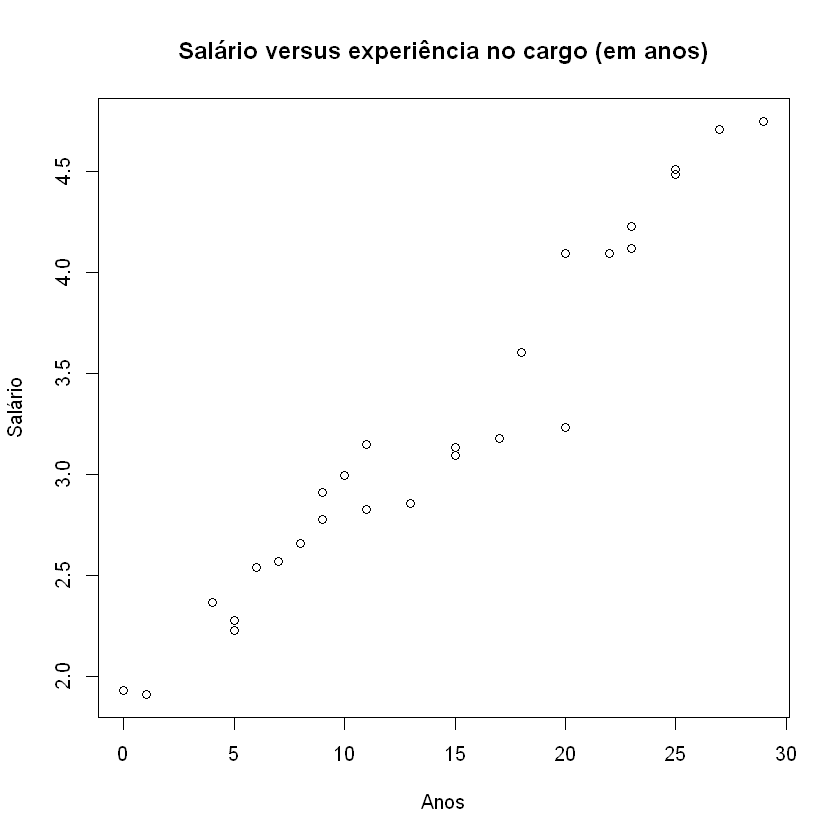

In [1]:
sal=c(1.93077, 3.17692, 2.27692, 3.13077, 2.77692, 3.09231, 2.65385, 2.22308, 2.85385,
      3.23077, 2.82308, 1.90769, 2.53846, 2.56923, 4.22308, 4.09231, 3.60000, 4.70769,
      3.14615, 2.99231, 4.74615, 4.11538, 2.36154, 4.09231, 4.50769, 2.90769, 4.48462)

anos=c(0,17,5,15,9,15,8,5,13,20,11,1,6,7,23,20,18,27,11,10, 29,23,4,22,25,9,25)

x1=rep("feminino",12); x2=rep("masculino",15); 
sexo=factor(c(x1,x2))

# Sendo 0 = feminino e 1 = Masculino
dados=data.frame(sal,anos,sexo)



plot(anos,sal,main="Salário versus experiência no cargo (em anos)", xlab="Anos",ylab="Salário")

In [2]:
require(lmtest)   #Carregando o pacote lmtest

Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



$\color{red}{\text{b)}}$ **A reta estimada é apresentada a seguir:**

In [3]:
dados=data.frame(sal,anos,sexo)
ajuste=lm(sal~anos,data=dados)
summary(ajuste)


Call:
lm(formula = sal ~ anos, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59635 -0.07929  0.03975  0.14497  0.26519 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.830747   0.076062   24.07   <2e-16 ***
anos        0.099818   0.004686   21.30   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2 on 25 degrees of freedom
Multiple R-squared:  0.9478,	Adjusted R-squared:  0.9457 
F-statistic: 453.8 on 1 and 25 DF,  p-value: < 2.2e-16


O modelo estimado é apresentado por $\hat{y}=1,830747+0,099818$. Este modelo informa que a cada aumento de uma unidade na taxa anual, o valor do salário aumenta em média 0,099818, o coeficiente de determinação associado ao modelo estimado é dado por $R^2=94,78\%$.

$\color{red}{\text{c)}}$ **O gráfico dos resíduos padronizados versus salários estimados é apresentado a seguir**

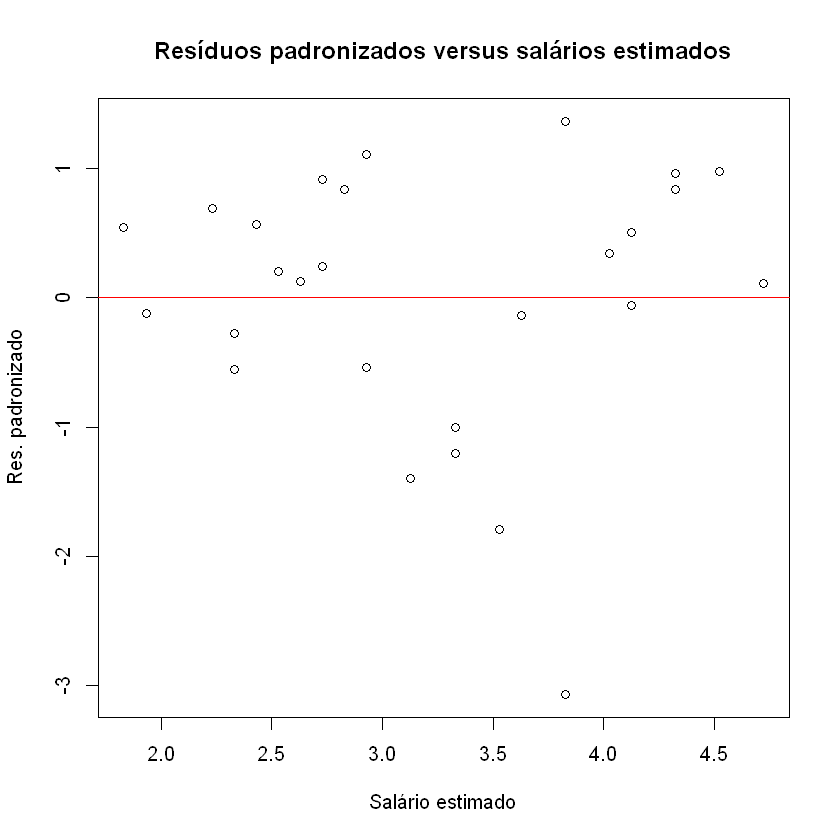

In [4]:
residuos=rstandard(ajuste)
previsao=predict(ajuste)
plot(previsao,residuos, main="Resíduos padronizados versus salários estimados", xlab="Salário estimado",ylab="Res. padronizado")
abline(h=0,col="red")

Observa-se que os resíduos não estão distribuídos em torno de zero de forma completamente aleatória. Para os resíduos menores que zero, observamos uma tendência decrescente desses valores à medida que aumentam os correspondentes valores preditos. Além disso, temos valores dos resíduos fora do intervalo (-2,33; 2,33). Esta análise indica que as suposições do modelo não estão todas satisfeitas. O teste de **Shapiro-Wilk** é apresentado a seguir.

In [5]:
#Teste de Normalidade nos resíduos
shapiro.test(residuals(ajuste))


	Shapiro-Wilk normality test

data:  residuals(ajuste)
W = 0.90255, p-value = 0.01531


Ao nível de 5% de significância existem evidências amostrais suficientes que nos levam a rejeição da hipótese nula, ou seja, os resíduos não distribuem-se normalmente. Portanto, apensar de termo obtido um valor de $R^2$ igual a 0,948, as suposições do modelo não estão todas satisfeitas. 

$\color{red}{\text{d)}}$ **Modelos de previsão para os gerêntes do sexo masculino e feminino**

In [6]:
sal_fem=c(1.93077, 3.17692, 2.27692, 3.13077, 2.77692, 3.09231, 2.65385, 2.22308, 2.85385,
      3.23077, 2.82308, 1.90769)
anos_fem=c(0,17,5,15,9,15,8,5,13,20,11,1)


sal_mas=c(2.53846, 2.56923, 4.22308, 4.09231, 3.60000, 4.70769,
      3.14615, 2.99231, 4.74615, 4.11538, 2.36154, 4.09231, 4.50769, 2.90769, 4.48462)
anos_mas=c(6,7,23,20,18,27,11,10, 29,23,4,22,25,9,25)

dados_fem=data.frame(sal_fem,anos_fem)
ajuste_fem=lm(sal_fem~anos_fem,data=dados_fem)
summary(ajuste_fem)



Call:
lm(formula = sal_fem ~ anos_fem, data = dados_fem)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18244 -0.05644 -0.01525  0.07400  0.17113 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.945176   0.059313    32.8 1.64e-11 ***
anos_fem    0.073402   0.005097    14.4 5.17e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1075 on 10 degrees of freedom
Multiple R-squared:  0.954,	Adjusted R-squared:  0.9494 
F-statistic: 207.4 on 1 and 10 DF,  p-value: 5.169e-08


O modelo estimado é dado por $\hat{y}=1,94+0,073X$, indicando que para cada aumento de uma unidade nos anos de experiência das mulheres o seu salário crescem em média 0,073402. O modelo apresentou um coeficiente de determinação de 95,4%.

O mesmo modelo de regressão obtido para os homens é dado por:

In [7]:
dados_mas=data.frame(sal_mas,anos_mas)
ajuste_mas=lm(sal_mas~anos_mas,data=dados_mas)
summary(ajuste_mas)



Call:
lm(formula = sal_mas ~ anos_mas, data = dados_mas)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14460 -0.06472 -0.00294  0.06167  0.15055 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.970160   0.053235   37.01 1.46e-14 ***
anos_mas    0.098580   0.002783   35.42 2.57e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08875 on 13 degrees of freedom
Multiple R-squared:  0.9897,	Adjusted R-squared:  0.989 
F-statistic:  1255 on 1 and 13 DF,  p-value: 2.566e-14


O modelo estimado é dado por $\hat{y}=1,97+0,098$, indicando que para um aumento em uma unidade na taxa média dos anos de trabalho dos homens o salário cresce em média 0,098580. O coeficiente de determinação apresentado pelo modelo é dado por 98,97%.

$\color{red}{\text{e)}}$ **O teste de coincidência entre retas** é apresentado a seguir: Inicialmente, vamos testar a igualdade dos interceptos dos dois modelos, para o que é necessário calcular a variância amostral **combinada** dos dois  grupos, $S_{\beta_0}$ que é obtida por:

$$S_{\beta_0}=\frac{SQE(1)+SQE(2)}{n_1+n_2-4}\bigg[\frac{1}{n_1}+\frac{1}{n_2}+\frac{\overline{x}_1^2}{S_{xx}^1}+\frac{\overline{x}_2^2}{S_{xx}^2}\bigg]$$

Onde o SQE é dado por:

$$SQE=SQT-SQ_{residuo}$$

Portanto, para calcular o SQT, temos:

$$SQT=S_{yy}=\sum(y_i-\overline{y})^2=\sum(y^2)-\frac{(\sum y)^2}{n}$$

e para o cálculo do $SQ_{residuo}$, temos:

$$SQ_{residuo}=\hat{\beta}_1^2\times S_{xx}$$

$$SQ_{residuo}=\hat{\beta}_1^2 \times \sum (x_i-\overline{x})^2= \hat{\beta}_1^2 \times \sum (x)^2-\frac{(\sum x)^2}{n}$$

Para determinar $\hat{\beta}_1$, temos

$$\hat{\beta_1}=\frac{S_{yy}}{S_{xx}}$$

Com $S_{xy}$, dado por:

$$S_{xy}=\sum(x_i-\overline{x})(y_i-\overline{y})^2=\sum xy - \frac{(\sum x_i)(\sum y_i)}{n}$$

A estatística de teste para testar se o intercepto é igual é dado por:
$$T_{\beta_1}=\frac{\hat{\beta}_{11}-\hat{\beta}_{12}}{\sqrt{S_{\beta_1}}}$$

Usando o R para efetuar os cálculos, temos:

In [8]:
#Cálculo da variância amostral combinada dos dois grupos.

#Para 0 sexo feminino
n_f=length(anos_fem)                                            #Tamanho da amostra do sexo feminino
SQT_fem=sum(sal_fem^2)-(sum(sal_fem)^2)/n_f                     #Soma de Quadrato total - SQT
Sxy_fem=sum(anos_fem*sal_fem)-(sum(anos_fem)*sum(sal_fem))/n_f  #Soma cruzada de X e Y
media_anosf=mean(anos_fem)                                      #Media dos Anos (mulheres)
media_salf=mean(sal_fem)                                        #Media do salários (mulheres)
Sxx_fem=sum(anos_fem^2)-(sum(anos_fem)^2)/n_f                   #Soma Sxx
beta1_fem=Sxy_fem/Sxx_fem                                       #Estimativa do Beta1
SQres_fem=beta1_fem^2*Sxx_fem                                   #Soma de quadrado da regressão (feminino)
SQE_fem=SQT_fem-SQres_fem                                       #Soma de quadrado do erro (feminino)
beta0_fem=media_salf-beta1_fem*media_anosf                      #Estimativa do Beta0 



#Para o sexo masculino
n_m=length(anos_mas)                                             #Tamanho da amostra do sexo masculino
SQT_mas=sum(sal_mas^2)-(sum(sal_mas)^2)/n_m                      #Soma de Quadrato total - SQT
Sxy_mas=sum(anos_mas*sal_mas)-(sum(anos_mas)*sum(sal_mas))/n_m   #Soma cruzada de X e Y
media_anosm=mean(anos_mas)                                       #Media dos Anos (masculino)
media_salm=mean(sal_mas)                                         #Media do salários (masculino)
Sxx_mas=sum(anos_mas^2)-(sum(anos_mas)^2)/n_m                    #Soma Sxx
beta1_mas=Sxy_mas/Sxx_mas                                        #Estimativa do Beta1
SQres_mas=beta1_mas^2*Sxx_mas                                    #Soma de quadrado da regressão (masculino)
SQE_mas=SQT_mas-SQres_mas                                        #Soma de quadrado do erro (masculino)
beta0_mas=media_salm-beta1_mas*media_anosm                       #Estimativa do Beta0 
    

#Variância amostral combinada da diferença entre os estimadores dos interceptos dos modelos 
SB0=(SQE_fem+SQE_mas)/(n_f+n_m-4)*(1/n_f + 1/n_m + media_anosf^2/Sxx_fem + media_anosm^2/Sxx_mas)
      
cat("O valor da variância amostral combinada é dado por",SB0,"\n\n")

O valor da variância amostral combinada é dado por 0.006294714 



In [9]:
#A estatística de teste é dada por
TB1=(beta0_fem-beta0_mas)/sqrt(SB0)
cat("A estatística de teste é igual a",TB1)


A estatística de teste é igual a -0.3149123

Pela tabela da distribuição t de Student, com 23 graus de liberdade e $\alpha/2=0,025$, encontramos o valor crítico igual a 2,069. Como o módulo do valor observado da estatística $T_{\beta_0}$ é menor do que o valor crítico encontrado, não rejeitamos a hipótese de igualdade os interceptos.  Vamos agora testar se as inclinações são iguais pra os dois modelos, para tanto precisamos calcular o valor da expressão dada abaixo:

$$S_{\beta_1}=\frac{SQE(1)+SQE(2)}{n_1+n_2-4}\bigg[\frac{1}{S_{xx}^1}+\frac{1}{S_{xx}^2} \bigg]$$

In [10]:
#Calculo da variância amostral combinada
SB1=(SQE_fem+SQE_mas)/(n_f+n_m-4)*(1/Sxx_fem+1/Sxx_mas)
cat("O valor da variância combinada para o parâmetro B1 é dada por",SB1,"\n\n")

O valor da variância combinada para o parâmetro B1 é dada por 3.062006e-05 



Assim, o valor da esttística de teste para $T_{\beta_1}$ é dada por:

$$T_{\beta_1}=\frac{\hat{\beta}_{11}-\hat{\beta}_{12}}{\sqrt{S_{\beta_1}}}$$

In [11]:
#Cálculo da estatística de teste
TB1=(beta1_fem-beta1_mas)/(sqrt(SB1))
cat("O valor da estatística de teste é",TB1,"\n\n")


O valor da estatística de teste é -4.550082 



Usando novamente $\alpha/2=2,5\%$, temos que o valor crítico da tabela t de Studente com 23 graus de liberdade é 2,069. Como o módulo do valor observado da estatística $T_{\beta_1}$ é maior que o valor crítico, rejeitamos a hipótese de igualdade das inclinações dos modelos. Portanto podemos concluir que os modelos para homens e mulheres não são coincidentes, embora não tenhamos rejeitado a hipótese de igualdade dos dois interceptos. Observando os valores das inclinações dos dois modelos, vemos que a inclinação para o modelo ajustado para o grupo das mulheres é menor que a inclinação do modelo ajustado para o grupo dos homens, o que permite afirmar que a taxa de crescimento dos salários é menor para as mulheres. 

$\color{red}{\text{f)}}$ **A análise dos resíduos para os modelos estimados para o grupo formado por mulheres e homens é apresentado a seguir**

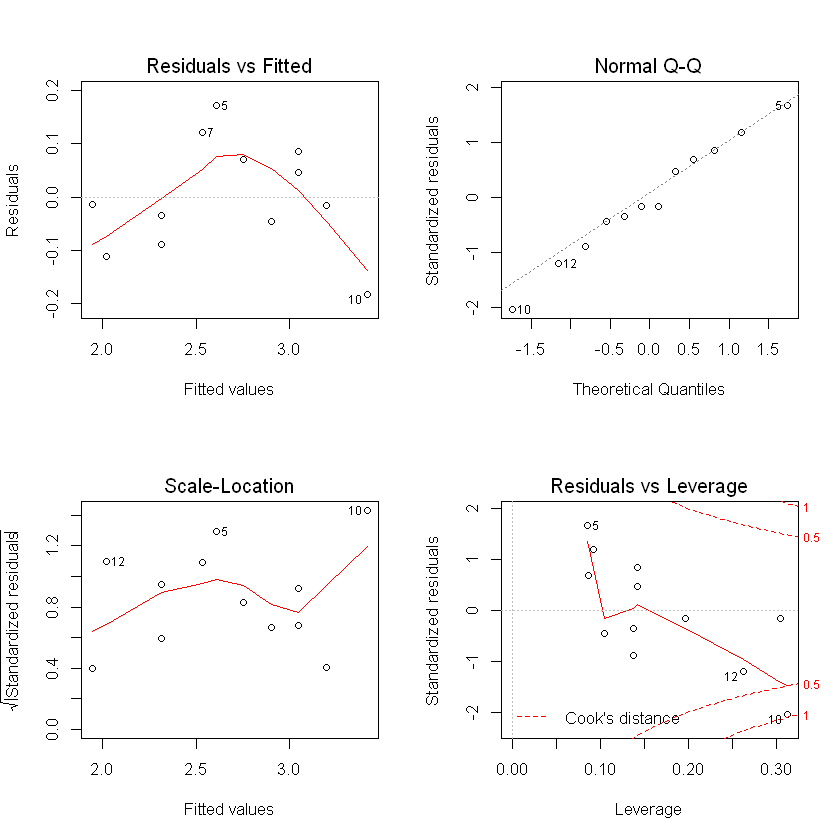

In [12]:
#Modelo para mulheres
par(mfrow=c(2,2))
plot(ajuste_fem)

A primeira figura, (resíduos versus valores preditos) não apresenta a tendência de crescimento que era apresentado ao gráfico conjunto. Além disso, todos os valores dos resíduos se encontram dentro do intervalo de (-2,33; 2,33). O gráfico de normalidade para os resíduos apresentam pontos situados em torno da uma reta, não havendo indicçaõ contra a hipótese de normalidade.

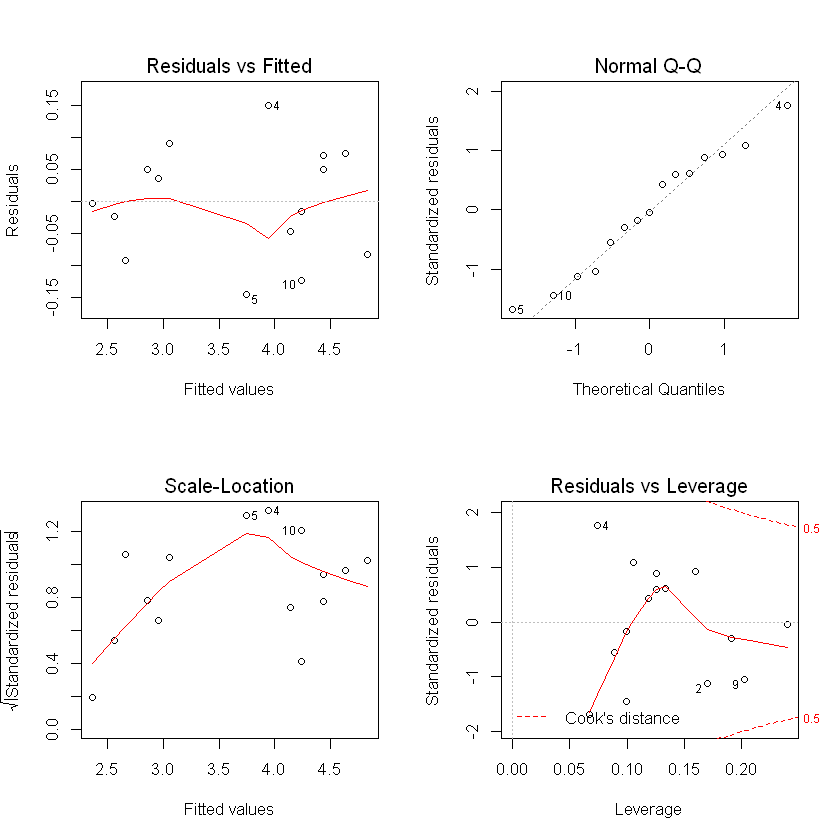

In [13]:
#Modelo para os homens
par(mfrow=c(2,2))
plot(ajuste_mas)

Para o gráfico (residos vs fitted) não apresenta para o grupo dos homens a tendência decrescente apresentada no gráfico conjunto. O gráfico de normalidade não apresenta um cenário que nos leve a rejeição da hipótese de normalidade dos resíduos. Portanto a conclusão que podemos chegar a partir dessa análise é de que as discrepâncias apresentadas na análise inicial, quando um único modelo foi ajustado para todo o conjunto de observações, deveram-se ao fato de não termos considerado grupos separados para cada sexo. Nas análises posteriores, vimos a necessidade de modelos distintos para cada um dos sexos, os quais nos explicam o fenômeno de maneira muito mais satistafória que o modelo único. 

$\color{red}{\text{Exercício 1}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino** Um experimento com sementes de soja foi feito durante um certo período, no qual as sementes foram submetidas à radiação solar e a dois níveis de ozônio, A e B. Após esse período foram coletados os pesos de cada semente e a quantidade de radiação solar que cada semente recebeu, para cada nível de ozônio. O objetivo era verificar se os pesos das sementes estariam relacionados com a quantidade de radiação recebida por essas sementes. Os dados coletados foram:

|  Ozônio  | Ozônio |  Ozônio  | Ozônio |
|:--------:|:------:|:--------:|:------:|
|     A    |    A   |     B    |    B   |
| Radiação |  Peso  | Radiação |  Peso  |
|   118,4  |   0,7  |   109,1  |   1,3  |
|   215,2  |   2,9  |   199,6  |   4,8  |
|   283,9  |   5,6  |   264,2  |   6,5  |
|   387,9  |   8,7  |   358,2  |   9,4  |
|   451,5  |  12,4  |   413,2  |  12,9  |
|   516,6  |  17,4  |   452,5  |  12,3  |

+ a) Ajuste um MRLS que explique peso em função da radiação, para cada nível de ozônio;
+ b) Calcule o coeficiente de determinação para cada modelo e comente os ajustes;
+ c) Para cada modelo encontre os intervalos de predição para os pesos quando a radiação for igual a 300;
+ d) Compare os dois modelos, verificando se é possível adotar um único modelo para os dois níveis de radiação;
+ e) Ajuste um único modelo para os dois níveis de ozônio;
+ f) Usando o modelo único, encontre o intervalo de predição para peso, quando a radiação for igual a 300. Compare com os intervalos encontrados no item (c).







In [14]:
#Entrando com os dados
radi_a=c(118.4, 215.2, 283.9, 387.9, 451.5,516.6)
peso_a=c(0.7, 2.9, 5.6, 8.7, 12.4, 17.4)
radi_b=c(109.1, 199.6, 264.2, 358.2, 413.2, 452.5)
peso_b=c(1.3, 4.8, 6.5, 9.4, 12.9, 12.3)

dados1=data.frame(peso_a,radi_a)
ajuste1=lm(peso_a~radi_a,data=dados1)
summary(ajuste1)


Call:
lm(formula = peso_a ~ radi_a, data = dados1)

Residuals:
      1       2       3       4       5       6 
 1.2627 -0.4516 -0.5297 -1.6351 -0.5069  1.8606 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.350467   1.542884  -3.468 0.025634 *  
radi_a       0.040437   0.004329   9.341 0.000731 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.455 on 4 degrees of freedom
Multiple R-squared:  0.9562,	Adjusted R-squared:  0.9452 
F-statistic: 87.25 on 1 and 4 DF,  p-value: 0.0007314


O modelo estimado é dado por ($\hat{y}=-5,3504+0,0404 \times \text{radiacao(a)}$). Este modelo possui um coeficiente de determinação de 95,62%. O modelo aponta que para cada aumento na taxa de radiação em um unidade a taxa do peso aumenta em média 0,040437. O próximo modelo descrito para o peso de B em função da radiação de B é apresentado a seguir:

In [15]:
dados2=data.frame(peso_b,radi_b)
ajuste2=lm(peso_b~radi_b,data=dados2)
summary(ajuste2)


Call:
lm(formula = peso_b ~ radi_b, data = dados2)

Residuals:
      1       2       3       4       5       6 
-0.1408  0.3043 -0.1762 -0.4492  1.1943 -0.7323 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.241867   0.830133  -2.701 0.054060 .  
radi_b       0.033755   0.002571  13.127 0.000194 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7596 on 4 degrees of freedom
Multiple R-squared:  0.9773,	Adjusted R-squared:  0.9716 
F-statistic: 172.3 on 1 and 4 DF,  p-value: 0.0001945


O modelo estimado é apresentado por ($\hat{y}=-2,241867+0,033755 \times radiacao(b)$). O modelo estimado explica em 97,73% a variação que é inerente ao processo. 

$\color{red}{\text{b)}}$ **Calcule o coeficiente de determinação para cada modelo e comente os ajustes**

In [16]:
# Peso(a)=f(rad(a))
R2_modelo1=cor(peso_a,radi_a)^2

# Peso(b)=f(rad(b))
R2_modelo2=cor(peso_b,radi_b)^2

cat("O coeficiente de determinação para o primeiro modelo é dado por",round(R2_modelo1*100,2),"%","e para o segundo modelo é",round(R2_modelo2*100,2),"%","\n\n")

O coeficiente de determinação para o primeiro modelo é dado por 95.62 % e para o segundo modelo é 97.73 % 



O modelo 2 apresenta o maior coeficiente de determinação, tal modelo poderá ser escolhido para a realização de inferências após análises dos resíduos.

$\color{red}{\text{c)}}$ **Para cada modelo encontre os intervalos de predição para os pesos quando a radiação for igual a 300**

In [17]:
# Modelo 1
cat("\nIntervalo de Predição para o primeiro modelo\n")
radiacao1=data.frame(radi_a=300)
predicao1=predict(ajuste1,radiacao1,interval="prediction")
predicao1


#Modelo 2
cat("\nIntervalo de Predição para o segundo modelo\n")
radiacao2=data.frame(radi_b=300)
predicao2=predict(ajuste2,radiacao2,interval="prediction")             #confidence
predicao2


Intervalo de Predição para o primeiro modelo


fit,lwr,upr
6.780691,2.402623,11.15876



Intervalo de Predição para o segundo modelo


fit,lwr,upr
7.884669,5.60676,10.16258


$\color{red}{\text{d)}}$ **Compare os dois modelos, verificando se é possível adotar um único modelo para os dois níveis e radiação**: O primeiro modelo apresentou um intervalo de predição que engloba o segundo modelo, desta forma pode-se trabalhar apenas com um único modelo de predição.

$\color{red}{\text{e)}}$ **Ajuste um único modelo para os dois níveis de ozônio** 

In [18]:
peso=c(peso_a,peso_b)                            #Entrando com os pesos
radiacao=c(radi_a,radi_b)                        #Entrando com a radiação
nivel=factor(rep(c("a","b"),c(6,6)))             #Entrando com os níveis no formato factor

dados3=data.frame(radiacao,peso,nivel)
ajuste3=lm(radiacao~peso+nivel,data=dados3)
summary(ajuste3)


Call:
lm(formula = radiacao ~ peso + nivel, data = dados3)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.065 -22.074   4.383  16.121  40.089 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  126.382     19.311   6.545 0.000106 ***
peso          25.476      1.822  13.985 2.07e-07 ***
nivelb       -27.327     18.065  -1.513 0.164645    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.29 on 9 degrees of freedom
Multiple R-squared:  0.9566,	Adjusted R-squared:  0.9469 
F-statistic: 99.12 on 2 and 9 DF,  p-value: 7.414e-07
